# Customer Segmentation
Customer segmentation is the method of distributing a customer base into collections of people based on mutual characteristics so organizations can market to group efficiently and competently individually.

The purpose of segmenting customers is to determine how to correlate to customers in multiple segments to maximize customer benefits. Perfectly done customer segmentation empowers marketers to interact with every customer in the best efficient approach.

The data includes the following features:

1. Customer ID


2. Customer Gender


3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)


5. Spending score of the customer (based on customer behaviour and spending nature)

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# converting the dtata from csv file to dataframe
df=pd.read_csv("Mall_Customers.csv")

In [3]:
# renaming the wrong column name in dataframe
df.rename(columns = {'Genre':'Gender'},inplace = True)

In [4]:
# printing the first 5 row of dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#check the number of column and rows in dataframe
df.shape

(200, 5)

In [6]:
# basic infomation of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# check for null value in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# getting information about Gender Cloumn
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [10]:
# drop the CustomerID Column not required
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

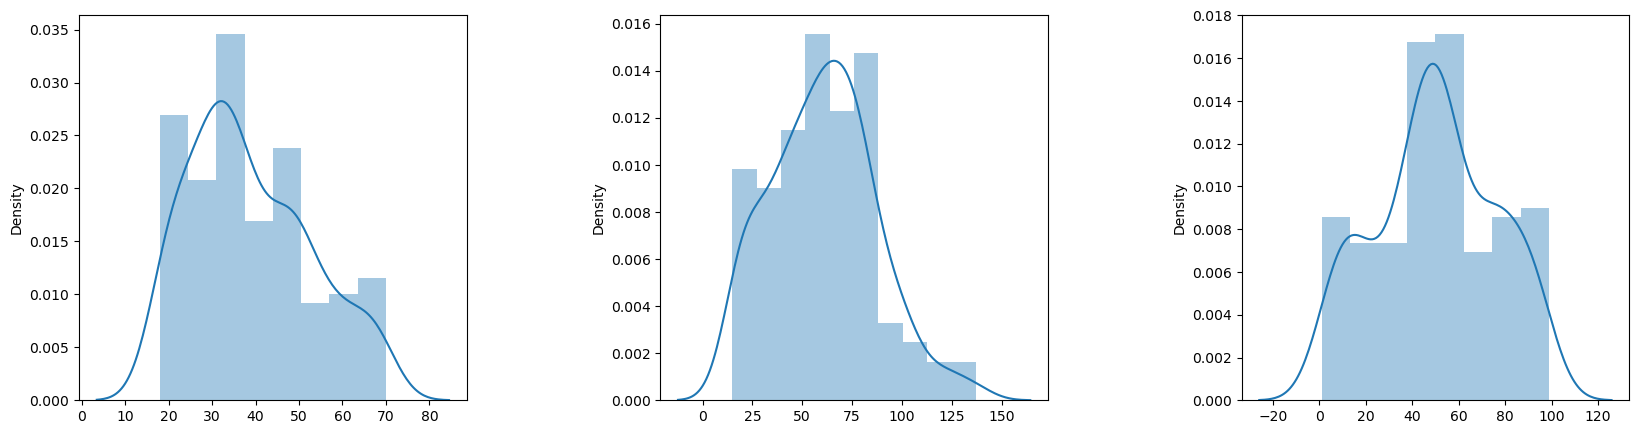

In [11]:
#plotting the visualization for different criteria 

plt.figure(1,figsize=(20,5))
n = 0 
for p in ['Age','Annual Income (k$)','Spending Score (1-100)']: 
    n= n + 1 
    plt.subplot(1,3,n) 
    plt.subplots_adjust(hspace = 0.5,wspace = 0.5) 
    sns.distplot(df,x = df[p])
plt.show()

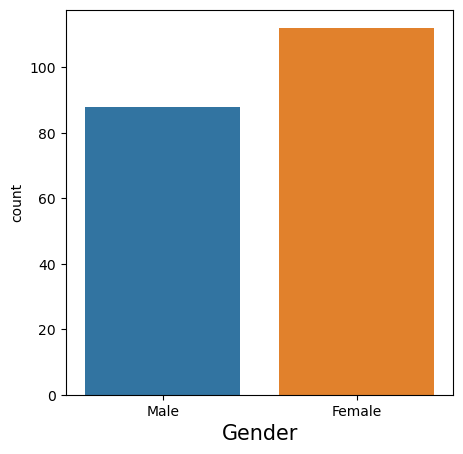

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(df, x = 'Gender')
plt.xlabel("Gender",fontsize = 15)
plt.show()

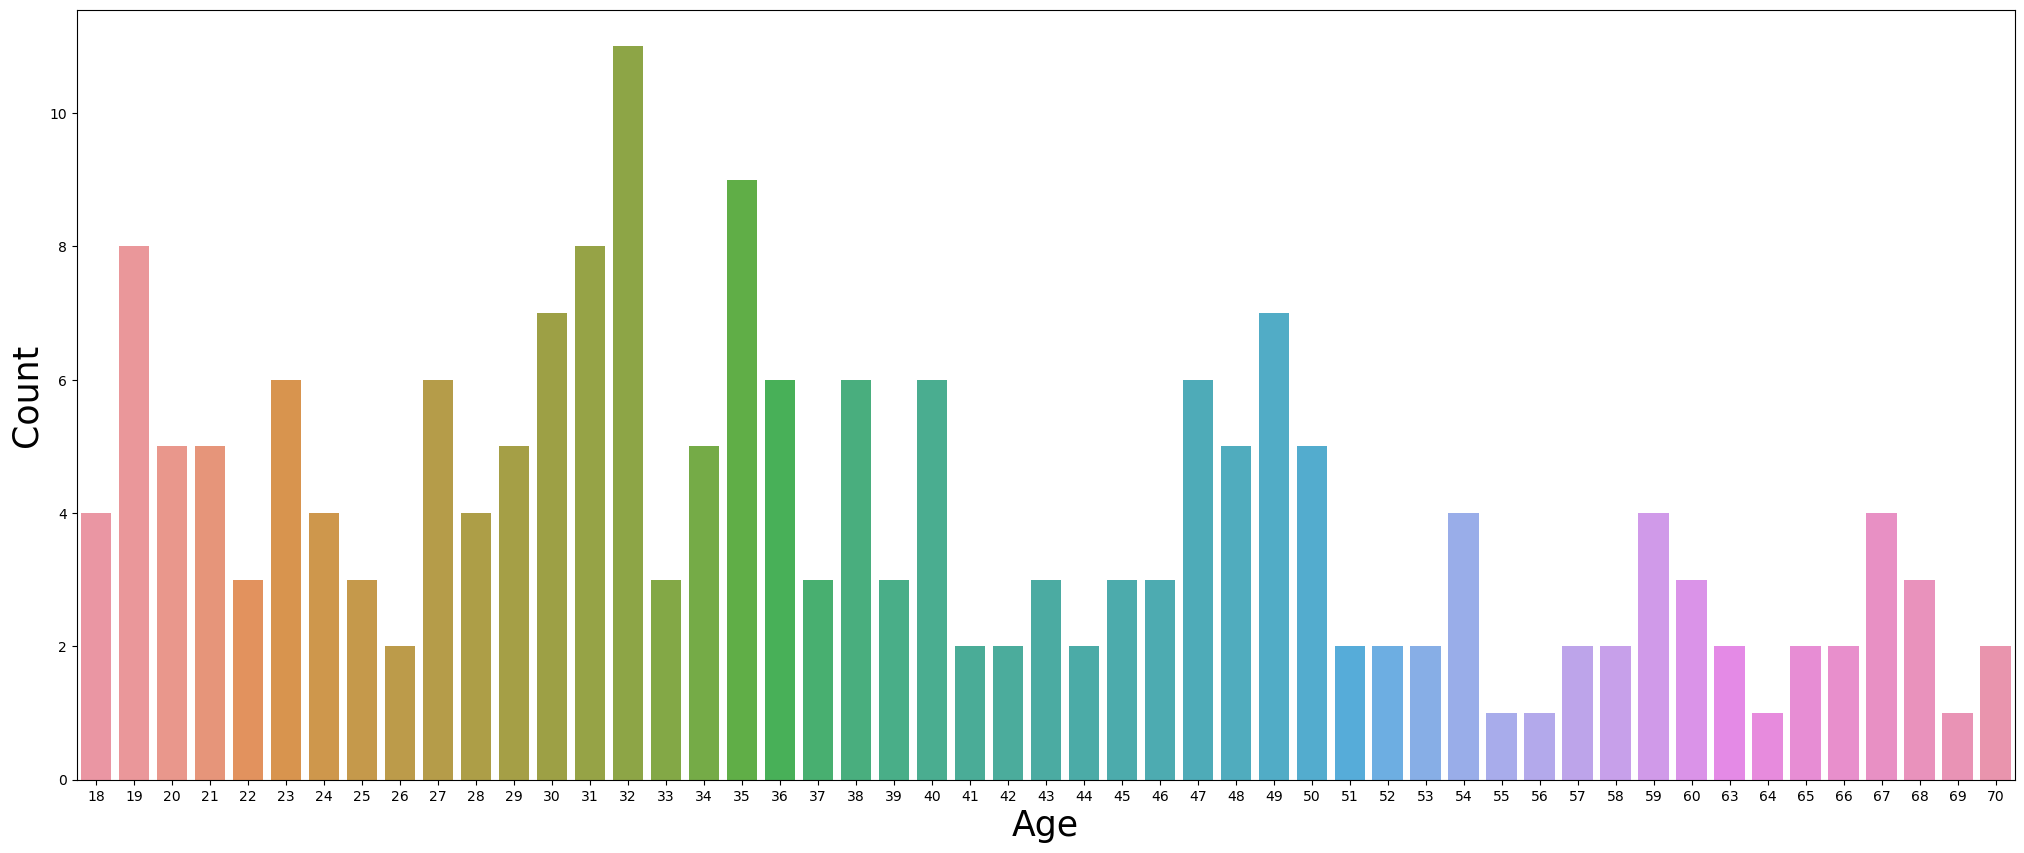

In [13]:
plt.figure(figsize=(25,10))
sns.countplot(df, x = 'Age')
plt.xlabel("Age",fontsize = 25)
plt.ylabel("Count",fontsize = 25)
plt.show()

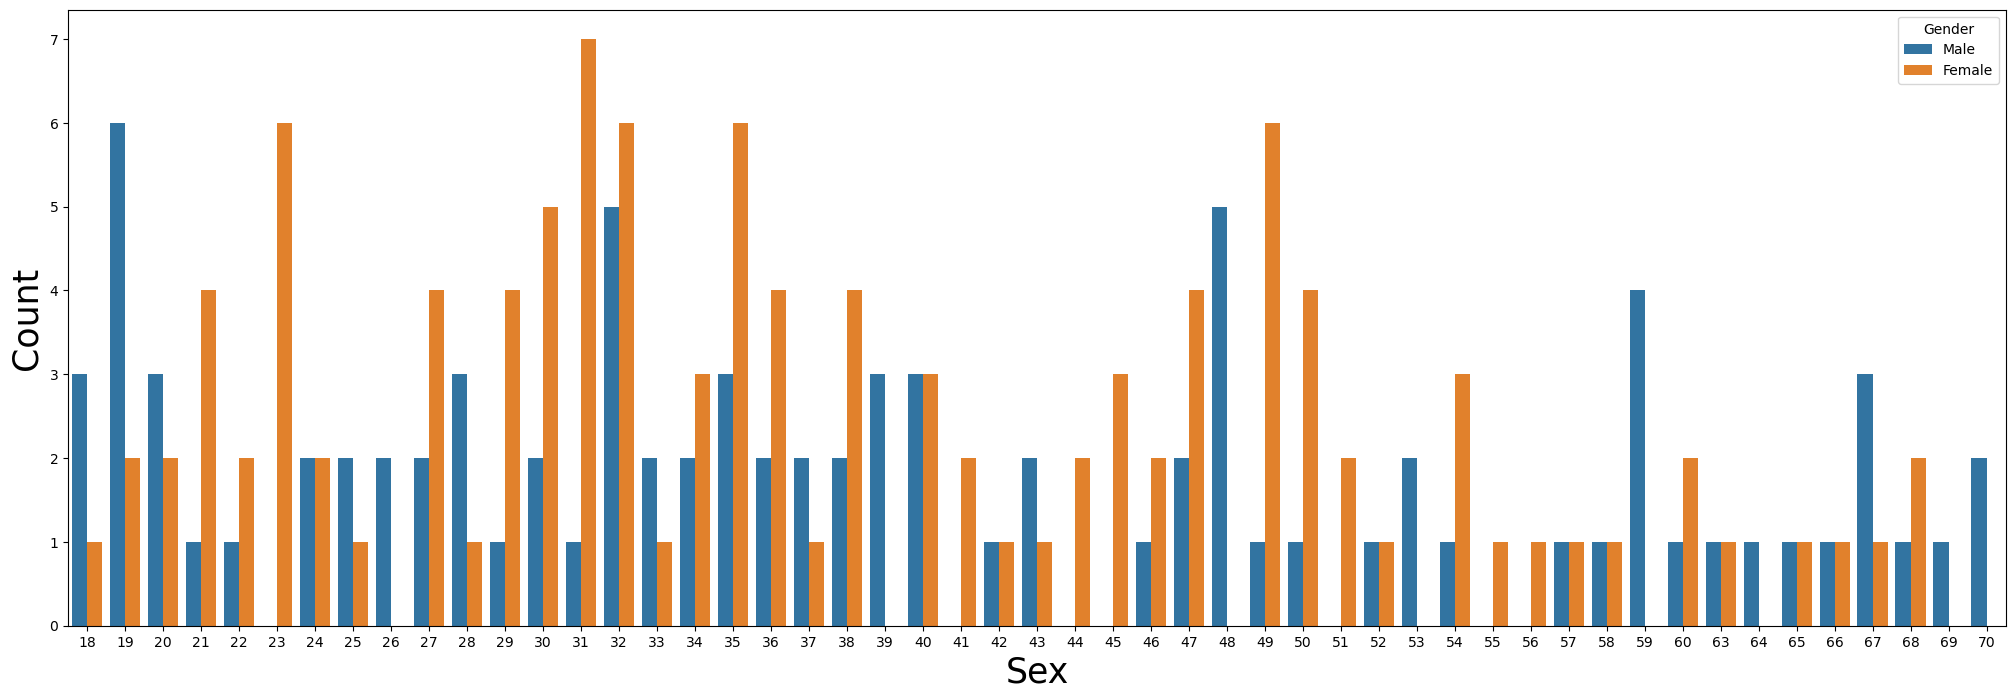

In [14]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x = "Age", hue = "Gender")
plt.xlabel("Sex",fontsize = 25)
plt.ylabel("Count",fontsize = 25)
plt.show()

In [15]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# K-Means Clustering with Scikit-Learn


K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data Labels for the training data (each data point is assigned to a single cluster)

For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps:

(i) Find the Euclidean distance between each data instance and centroids of all the clusters;

(ii) Assign the data instances to the cluster of the centroid with nearest distance;

(iii) Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.

**Here we are Majorly focused on Annual Income and Spending Score**

In [16]:
df.iloc[:,[2,3]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
X = df.iloc[:,[2,3]].values
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [19]:
type(X)

numpy.ndarray

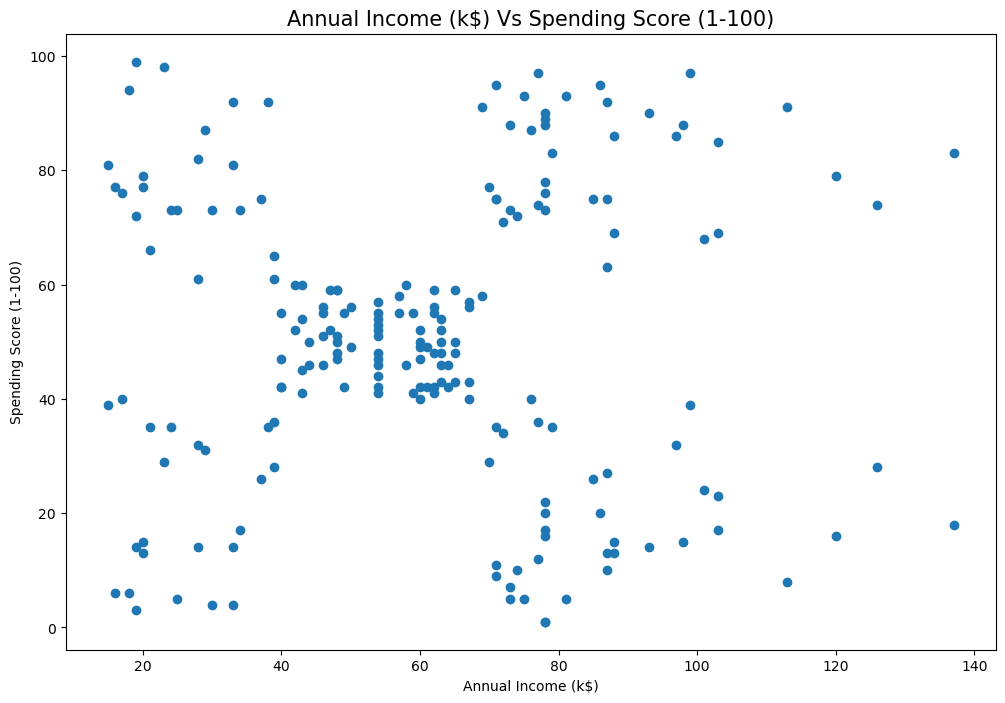

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) Vs Spending Score (1-100)",fontsize = 15)
plt.show()

# Implementing K Means Algorithm

In [21]:
#starting with no. of clusters equal to 2.

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_) #no of centroids

[[37.28888889 50.28888889]
 [79.6        50.12727273]]


In [22]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


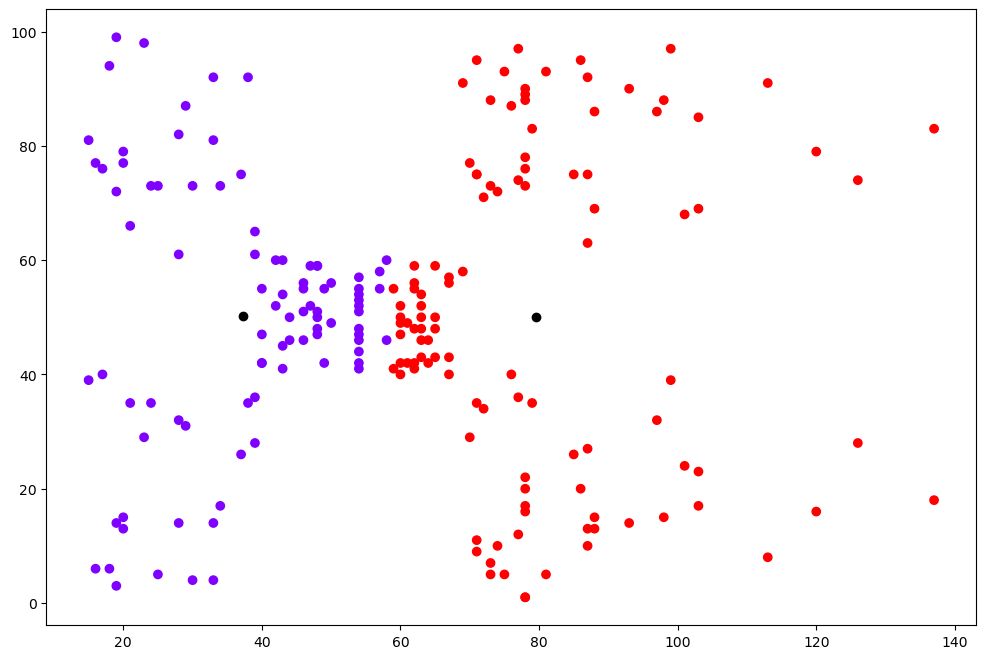

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

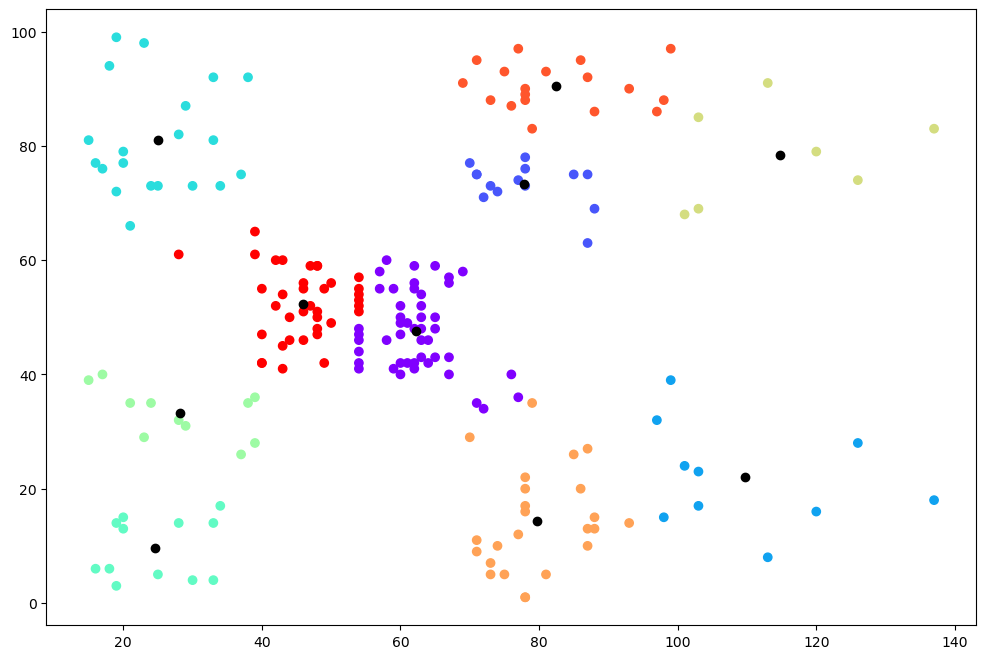

In [24]:
#no. of clusters equal to 10.
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

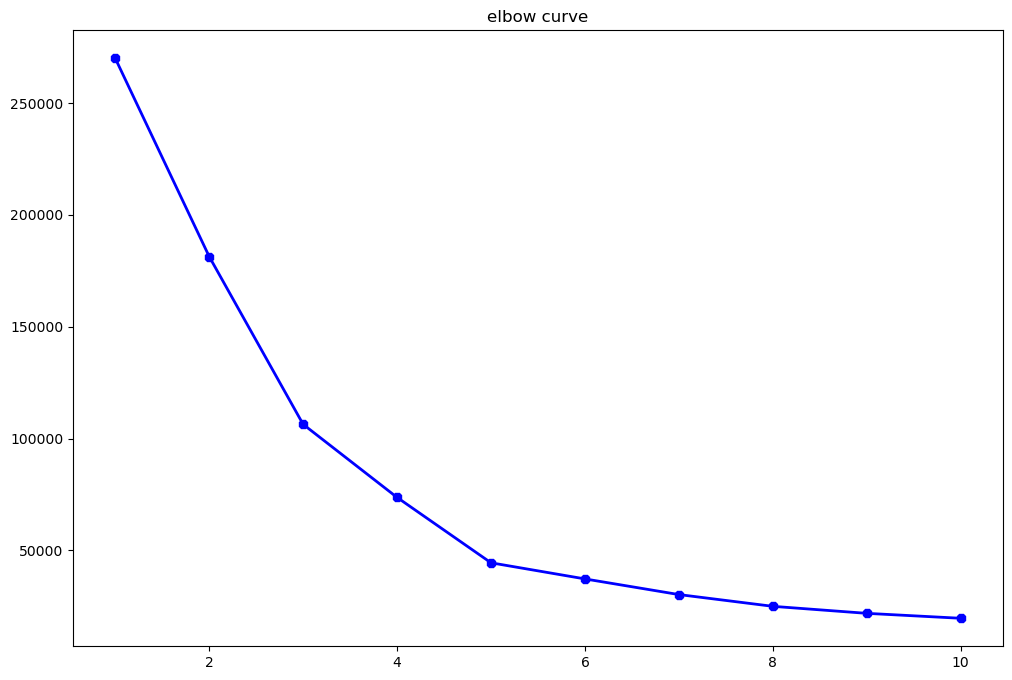

In [25]:
plt.figure(figsize=(12,8))

wcss=[] # distortion within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2, color="blue", marker ="8")
plt.title('elbow curve')
plt.show()

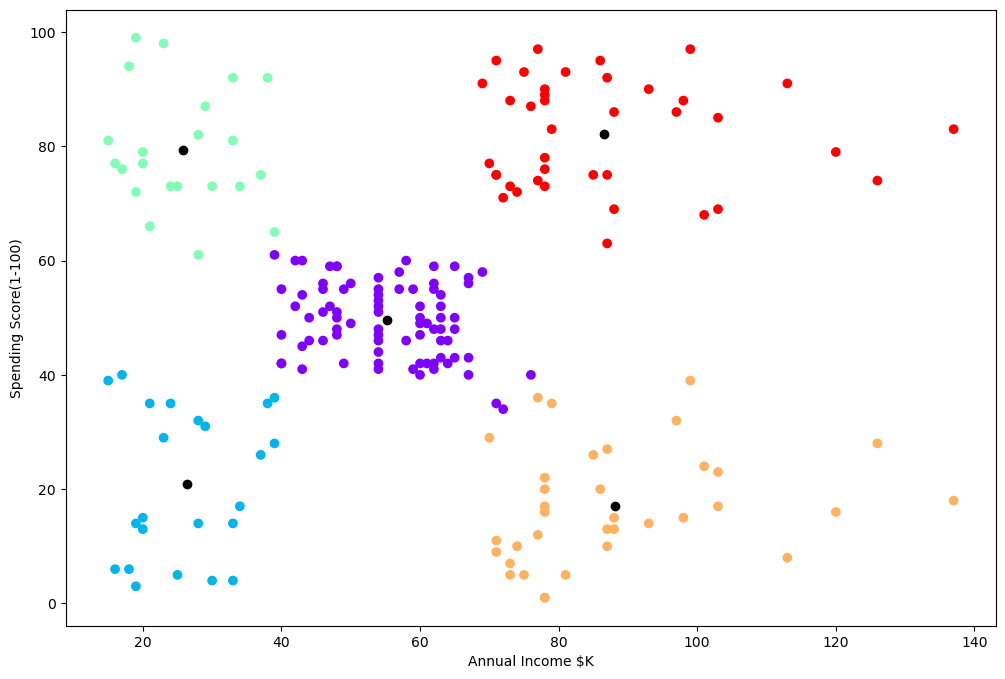

In [26]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('Annual Income $K')
plt.ylabel('Spending Score(1-100)')
plt.show()